# Data_preparation

### import all relevant libraries

* install haversine ($ pip install haversine ; https://pypi.org/project/haversine/ )


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from haversine import haversine, Unit

sns.set()
sns.set_style("whitegrid")
sns.set_palette("GnBu_d")




### define readin functions:

In [2]:
def trip_data_readin (city):
    trip_data = pd.read_csv("Project_Data/Trip_Data/"+city+".csv", encoding = "ISO-8859-1")
    trip_data = trip_data_data_prep(trip_data)
    trip_data = merge_trip_data_with_weather_data(trip_data, city)
    return trip_data


def trip_data_data_prep(trip_data):
    trip_data["datetime_start"] = pd.to_datetime(trip_data['day'] + ' ' + trip_data['time'])
    trip_data["trip_duration"] = pd.to_timedelta(trip_data["trip_duration"])
    trip_data["datetime_end"] = trip_data["datetime_start"] + trip_data["trip_duration"]
    trip_data["weekday"] = pd.to_datetime(trip_data["datetime_start"]).dt.weekday
    trip_data["month"] = trip_data["datetime_start"].dt.month
    trip_data["hour" ] = trip_data["datetime_start"].dt.hour
    
    trip_data = distance_between_coordinates (trip_data)    
    return trip_data

def distance_between_coordinates (trip_data):
    trip_data["distance"] = trip_data.apply(lambda row: haversine((row["orig_lat"], row["orig_lng"]),(row["dest_lat"], row["dest_lng"]),Unit.KILOMETERS), axis=1) 
    return trip_data




def merge_trip_data_with_weather_data (trip_data, city):
    trip_data.set_index(pd.DatetimeIndex(trip_data["datetime_start"]),inplace=True)
    weather = read_DWD_data (city)
    trip_data["rounded_time_hourly"] = trip_data["datetime_start"].dt.round("H")
    combined = pd.merge(trip_data, weather , on="rounded_time_hourly", how='left')
    combined["wind"] = combined['wind'].fillna(method="ffill")
    combined["rain"] = combined['rain'].fillna(method="ffill")
    combined["temp"] = combined['temp'].fillna(method="ffill")
    return combined


def read_DWD_data (city):
    
    temp_data = pd.read_csv("Project_Data/Weather_Data/"+city+"/"+"data_TT_TU_MN009.csv", encoding = "ISO-8859-1")
    temp_data =temp_data.rename(columns={"Zeitstempel": "rounded_time_hourly"})
    temp_data.set_index((pd.to_datetime(temp_data['rounded_time_hourly'].astype(str), format='%Y%m%d%H%M') ),inplace=True)
    temp_data=temp_data.drop(['Produkt_Code', 'SDO_ID','SDO_ID','Qualitaet_Niveau','Qualitaet_Byte','rounded_time_hourly'], axis=1)
    temp_data.columns = ['temp']


    wind_data = pd.read_csv("Project_Data/Weather_Data/"+city+"/"+"data_F_MN003.csv", encoding = "ISO-8859-1")
    wind_data =wind_data.rename(columns={"Zeitstempel": "rounded_time_hourly"})
    wind_data.set_index((pd.to_datetime(wind_data['rounded_time_hourly'].astype(str), format='%Y%m%d%H%M') ),inplace=True)
    wind_data = wind_data.drop(['Produkt_Code', 'SDO_ID','SDO_ID','Qualitaet_Niveau','Qualitaet_Byte','rounded_time_hourly'], axis=1)
    wind_data.columns = ['wind']

    
    rain_data = pd.read_csv("Project_Data/Weather_Data/"+city+"/"+"data_R1_MN008.csv", encoding = "ISO-8859-1")
    rain_data =rain_data.rename(columns={"Zeitstempel": "rounded_time_hourly"})
    rain_data.set_index((pd.to_datetime(rain_data['rounded_time_hourly'].astype(str), format='%Y%m%d%H%M') ),inplace=True)
    rain_data = rain_data.drop(['Produkt_Code', 'SDO_ID','SDO_ID','Qualitaet_Niveau','Qualitaet_Byte','rounded_time_hourly'], axis=1)
    rain_data.columns = ['rain']
    
    
    weather = pd.merge(temp_data, wind_data , on="rounded_time_hourly", how='left')
    weather = pd.merge(weather, rain_data , on="rounded_time_hourly", how='left')
    return weather



## Create combined Dataset


In [3]:
def export (city_name):
    data_set = trip_data_readin(city_name)
    data_set.to_csv("Project_Data/Combined_Data/"+city_name+".csv") 



In [4]:
# execute only in case of new data updates #

# export ("duesseldorf")
# export ("bremen")


In [3]:
from datetime import datetime, timedelta

In [4]:
def time_until_rental (trip_data):
    trip_data["datetime_start"] = pd.to_datetime(trip_data["datetime_start"])
    trip_data["datetime_end"] = pd.to_datetime(trip_data["datetime_end"])
    difference= []
    for i in range(len(trip_data)-1):
        if trip_data["b_number"][i]==trip_data["b_number"][i+1]:
            comp1=trip_data["datetime_start"][i+1]
            #print(comp1)
            comp2=trip_data["datetime_end"][i]
            #print(comp2)
            compare=comp1-comp2
            difference_in=compare.total_seconds()/3600
            difference_in
            #print(difference_in)
            difference.append(difference_in)
        else: 
            difference.append(np.nan)
            #print(np.nan)
    difference.append(np.nan)
    trip_data["difference"] = difference 
    print(trip_data.head(5))
    print(trip_data.info())

In [5]:
D = pd.read_csv('duesseldorf.csv', index_col="Unnamed: 0")
print(D.columns)
D.head()


Index(['day', 'time', 'b_number', 'city', 'trip_duration', 'orig_lat',
       'orig_lng', 'dest_lat', 'dest_lng', 'datetime_start', 'datetime_end',
       'weekday', 'month', 'hour', 'distance', 'rounded_time_hourly', 'temp',
       'wind', 'rain'],
      dtype='object')


,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,datetime_start,datetime_end,weekday,month,hour,distance,rounded_time_hourly,temp,wind,rain
0,2019-02-06,15:35:00,538,duesseldorf,0 days 00:17:00,51.218927,6.765862,51.240644,6.781982,2019-02-06 15:35:00,2019-02-06 15:52:00,2,2,15,2.662958,2019-02-06 16:00:00,9.5,5.0,0.0
1,2019-02-19,15:57:00,538,duesseldorf,0 days 00:23:00,51.213766,6.751624,51.223056,6.779230,2019-02-19 15:57:00,2019-02-19 16:20:00,1,2,15,2.182598,2019-02-19 16:00:00,10.3,5.6,0.0
2,2019-03-22,13:20:00,538,duesseldorf,0 days 01:20:00,51.229671,6.797855,51.218527,6.794867,2019-03-22 13:20:00,2019-03-22 14:40:00,4,3,13,1.256486,2019-03-22 13:00:00,19.0,3.5,0.0
3,2019-03-27,06:34:00,538,duesseldorf,0 days 00:22:00,51.218527,6.794867,51.252515,6.782041,2019-03-27 06:34:00,2019-03-27 06:56:00,2,3,6,3.883302,2019-03-27 07:00:00,4.8,0.5,0.0
4,2019-03-28,14:54:00,538,duesseldorf,0 days 00:12:00,51.252515,6.782041,51.242592,6.782100,2019-03-28 14:54:00,2019-03-28 15:06:00,3,3,14,1.103349,2019-03-28 15:00:00,12.5,1.7,0.0


In [6]:
HB = pd.read_csv('bremen.csv', index_col="Unnamed: 0")
print(HB.columns)
HB.head()

Index(['day', 'time', 'b_number', 'city', 'trip_duration', 'orig_lat',
       'orig_lng', 'dest_lat', 'dest_lng', 'datetime_start', 'datetime_end',
       'weekday', 'month', 'hour', 'distance', 'rounded_time_hourly', 'temp',
       'wind', 'rain'],
      dtype='object')


,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,datetime_start,datetime_end,weekday,month,hour,distance,rounded_time_hourly,temp,wind,rain
0,2019-04-21,17:34:00,20507,bremen,0 days 00:13:00,53.078923,8.884911,53.078711,8.899906,2019-04-21 17:34:00,2019-04-21 17:47:00,6,4,17,1.001900,2019-04-21 18:00:00,20.4,NaN,0.0
1,2019-05-23,15:33:00,20507,bremen,0 days 00:07:00,53.078923,8.884911,53.078004,8.876828,2019-05-23 15:33:00,2019-05-23 15:40:00,3,5,15,0.549476,2019-05-23 16:00:00,20.7,NaN,0.0
2,2019-06-14,22:30:00,20507,bremen,0 days 00:08:00,53.078923,8.884911,53.074731,8.876003,2019-06-14 22:30:00,2019-06-14 22:38:00,4,6,22,0.755886,2019-06-14 22:00:00,19.6,NaN,0.0
3,2019-06-16,10:00:00,20507,bremen,0 days 02:02:00,53.074731,8.876003,53.078923,8.884911,2019-06-16 10:00:00,2019-06-16 12:02:00,6,6,10,0.755886,2019-06-16 10:00:00,21.6,NaN,0.0
4,2019-06-16,12:55:00,20507,bremen,0 days 02:23:00,53.078923,8.884911,53.076236,8.891322,2019-06-16 12:55:00,2019-06-16 15:18:00,6,6,12,0.522213,2019-06-16 13:00:00,21.8,NaN,0.0


In [43]:
#iris.insert(11, "difference", "")
#del iris["difference"]
#iris.head(20)


In [7]:
time_until_rental(D)

          day      time  b_number         city    trip_duration   orig_lat  \
0  2019-02-06  15:35:00       538  duesseldorf  0 days 00:17:00  51.218927   
1  2019-02-19  15:57:00       538  duesseldorf  0 days 00:23:00  51.213766   
2  2019-03-22  13:20:00       538  duesseldorf  0 days 01:20:00  51.229671   
3  2019-03-27  06:34:00       538  duesseldorf  0 days 00:22:00  51.218527   
4  2019-03-28  14:54:00       538  duesseldorf  0 days 00:12:00  51.252515   

   orig_lng   dest_lat  dest_lng      datetime_start        datetime_end  \
0  6.765862  51.240644  6.781982 2019-02-06 15:35:00 2019-02-06 15:52:00   
1  6.751624  51.223056  6.779230 2019-02-19 15:57:00 2019-02-19 16:20:00   
2  6.797855  51.218527  6.794867 2019-03-22 13:20:00 2019-03-22 14:40:00   
3  6.794867  51.252515  6.782041 2019-03-27 06:34:00 2019-03-27 06:56:00   
4  6.782041  51.242592  6.782100 2019-03-28 14:54:00 2019-03-28 15:06:00   

   weekday  month  hour  distance  rounded_time_hourly  temp  wind  rain  

In [16]:
D_group_month=D.groupby("month").mean()
D_group_month.head(10)

,b_number,orig_lat,orig_lng,dest_lat,dest_lng,weekday,hour,distance,temp,wind,rain,difference
month,,,,,,,,,,,,
2,24456.965096,51.226890,6.788834,51.226522,6.789177,3.095986,12.577661,1.929534,9.351134,4.288307,0.012042,227.553220
3,28932.226322,51.229226,6.779222,51.230019,6.780371,3.756458,13.136531,1.939735,11.697171,4.095449,0.022263,127.677369
4,29599.165752,51.229574,6.782512,51.229215,6.782225,2.895333,12.601922,1.899157,14.499314,4.219698,0.014894,65.335421
5,30532.868967,51.228543,6.785206,51.228577,6.785286,3.100730,13.209596,1.710480,14.460774,3.487682,0.060269,55.288059
6,31397.896863,51.222143,6.785486,51.222159,6.785207,3.291275,13.714118,1.710536,23.181363,4.013441,0.021402,26.827272


In [15]:
D_group_day=D.groupby("weekday").mean()
D_group_day.head(10)

,b_number,orig_lat,orig_lng,dest_lat,dest_lng,month,hour,distance,temp,wind,rain,difference
weekday,,,,,,,,,,,,
0,30536.840951,51.226163,6.786057,51.225425,6.785793,5.219835,13.199726,1.646149,19.992230,3.619059,0.017824,48.654553
1,30567.879715,51.224522,6.785094,51.224334,6.785389,5.174350,13.015088,1.691485,19.489396,3.755490,0.010520,52.065166
2,30447.854894,51.225131,6.787491,51.225283,6.787930,5.161702,13.106383,1.709517,18.654511,4.124681,0.050851,51.811407
3,30528.985662,51.226065,6.787220,51.225180,6.786760,5.233511,13.079476,1.976847,16.768537,4.410037,0.032405,51.294341
4,30590.702627,51.223417,6.784374,51.224317,6.784010,5.169177,13.713135,1.715676,17.916883,3.655026,0.028511,46.861006
5,30760.490685,51.225447,6.781637,51.225683,6.781746,5.259481,14.085163,1.782044,19.550832,3.688224,0.050832,51.262078
6,30739.827343,51.225070,6.782897,51.225160,6.782336,5.292812,13.184989,1.770542,21.201480,4.436681,0.001621,49.741631


In [18]:
D_group_hour=D.groupby("hour").mean()
D_group_hour.head(30)

,b_number,orig_lat,orig_lng,dest_lat,dest_lng,weekday,month,distance,temp,wind,rain,difference
hour,,,,,,,,,,,,
0,29758.213930,51.222966,6.788209,51.223698,6.789570,4.213930,5.124378,1.470718,13.294527,2.659204,0.083085,66.107168
1,30440.641509,51.224738,6.788344,51.225571,6.788616,3.874214,5.396226,1.112692,14.269182,2.299371,0.013208,87.782629
2,26424.710526,51.219439,6.787261,51.220769,6.788644,4.210526,4.710526,1.540423,11.588158,3.084211,0.018421,64.170892
3,31461.333333,51.232725,6.785476,51.231340,6.788665,2.642857,5.357143,0.990708,12.773810,2.491667,0.025000,54.480864
4,30832.359155,51.227365,6.787548,51.231372,6.787595,2.366197,5.478873,1.493370,13.747887,2.758451,0.011268,41.529902
5,30286.815618,51.227763,6.791260,51.229889,6.785070,2.299349,5.117137,1.900632,12.856399,3.253145,0.025380,41.498304
6,30756.951426,51.225756,6.786159,51.226593,6.782151,2.183738,5.168955,1.961684,14.296727,3.560929,0.011510,45.707873
7,30498.772000,51.224779,6.787035,51.226380,6.784126,2.748000,4.982667,1.971647,14.840133,3.746133,0.010133,57.659922
8,30376.508580,51.223119,6.786699,51.222987,6.785714,3.229329,5.143526,1.483675,17.336349,3.919189,0.011076,52.389488


In [25]:
time_until_rental(HB)

          day      time  b_number    city    trip_duration   orig_lat  \
0  2019-04-21  17:34:00     20507  bremen  0 days 00:13:00  53.078923   
1  2019-05-23  15:33:00     20507  bremen  0 days 00:07:00  53.078923   
2  2019-06-14  22:30:00     20507  bremen  0 days 00:08:00  53.078923   
3  2019-06-16  10:00:00     20507  bremen  0 days 02:02:00  53.074731   
4  2019-06-16  12:55:00     20507  bremen  0 days 02:23:00  53.078923   

   orig_lng   dest_lat  dest_lng      datetime_start        datetime_end  \
0  8.884911  53.078711  8.899906 2019-04-21 17:34:00 2019-04-21 17:47:00   
1  8.884911  53.078004  8.876828 2019-05-23 15:33:00 2019-05-23 15:40:00   
2  8.884911  53.074731  8.876003 2019-06-14 22:30:00 2019-06-14 22:38:00   
3  8.876003  53.078923  8.884911 2019-06-16 10:00:00 2019-06-16 12:02:00   
4  8.884911  53.076236  8.891322 2019-06-16 12:55:00 2019-06-16 15:18:00   

   weekday  month  hour  distance  rounded_time_hourly  temp  wind  rain  \
0        6      4    17  1.0

In [60]:
D_clean = D.dropna(axis=0)
D_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17323 entries, 0 to 18061
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   day                  17323 non-null  object        
 1   time                 17323 non-null  object        
 2   b_number             17323 non-null  int64         
 3   city                 17323 non-null  object        
 4   trip_duration        17323 non-null  object        
 5   orig_lat             17323 non-null  float64       
 6   orig_lng             17323 non-null  float64       
 7   dest_lat             17323 non-null  float64       
 8   dest_lng             17323 non-null  float64       
 9   datetime_start       17323 non-null  datetime64[ns]
 10  datetime_end         17323 non-null  datetime64[ns]
 11  weekday              17323 non-null  int64         
 12  month                17323 non-null  int64         
 13  hour                 17323 non-

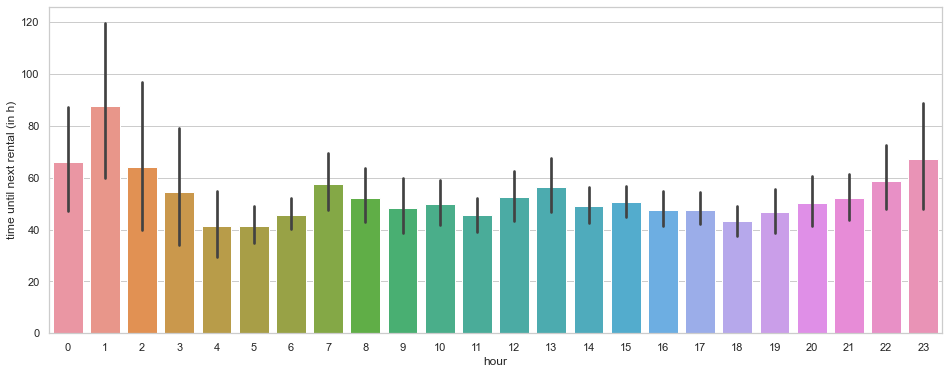

In [61]:
plt.figure(figsize=(16, 6))
barplot= sns.barplot(x="hour", y="difference",data=D_clean)
barplot.set(xlabel="hour", ylabel="time until next rental (in h)")
plt.show()

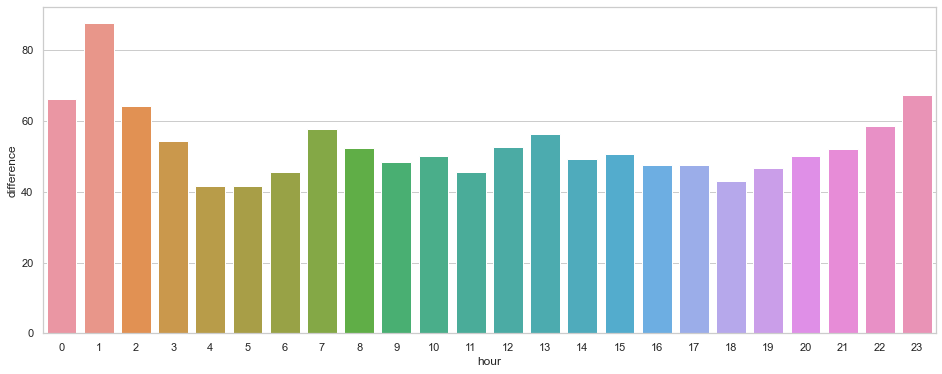

In [66]:
plt.figure(figsize=(16, 6))
sns.barplot(x="hour", y="difference",data=D, ci=None)
plt.show()

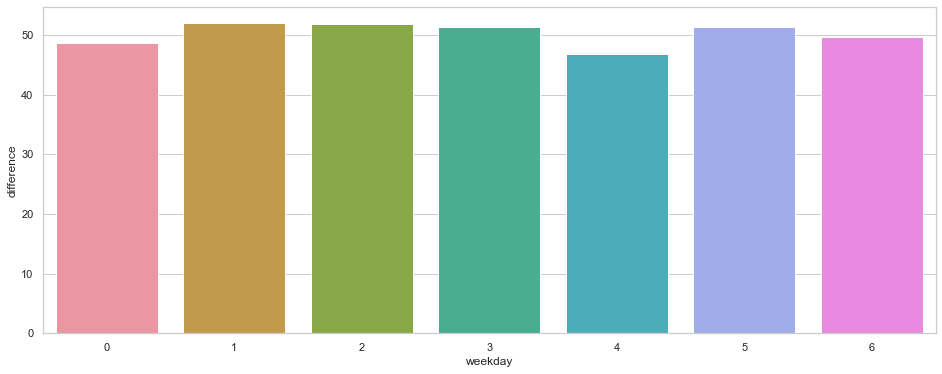

In [27]:
plt.figure(figsize=(16, 6))
sns.barplot(x="weekday", y="difference",data=D, ci=None)
plt.show()

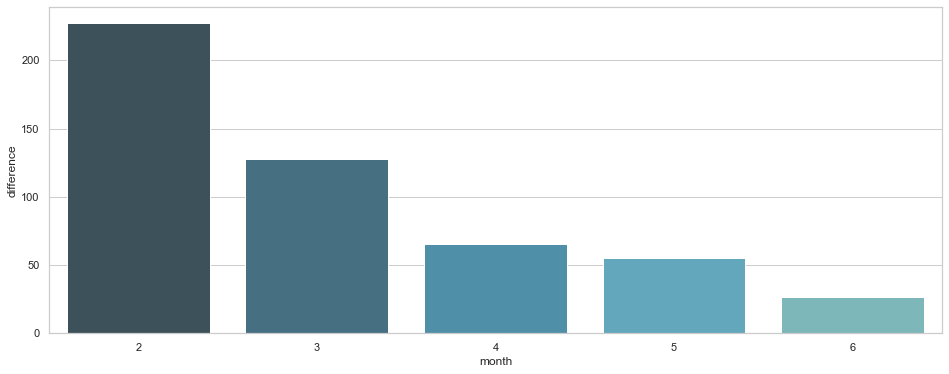

In [28]:
plt.figure(figsize=(16, 6))
sns.barplot(x="month", y="difference",data=D, ci=None)
plt.show()

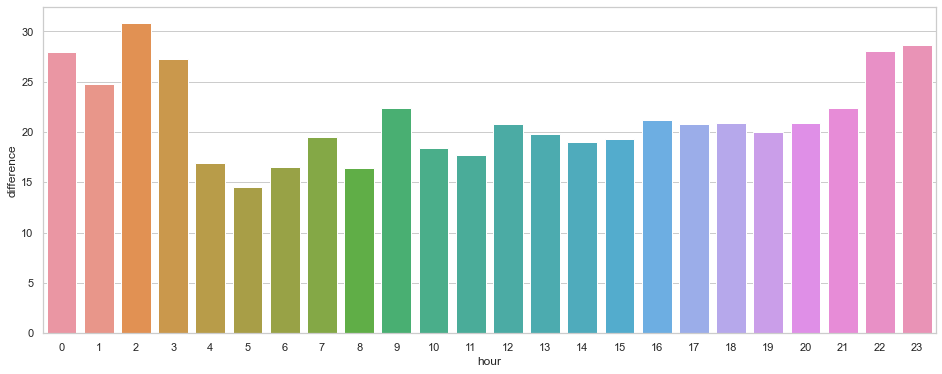

In [70]:
plt.figure(figsize=(16, 6))
sns.barplot(x="hour", y="difference",data=HB, ci=None)
plt.show()

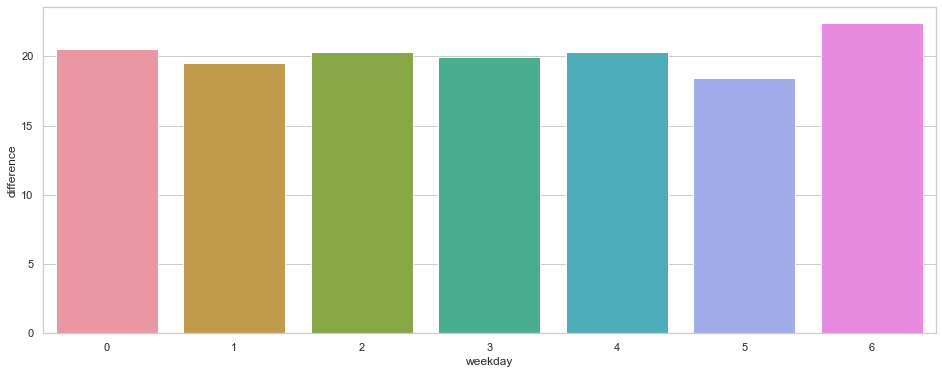

In [29]:
plt.figure(figsize=(16, 6))
sns.barplot(x="weekday", y="difference",data=HB, ci=None)
plt.show()

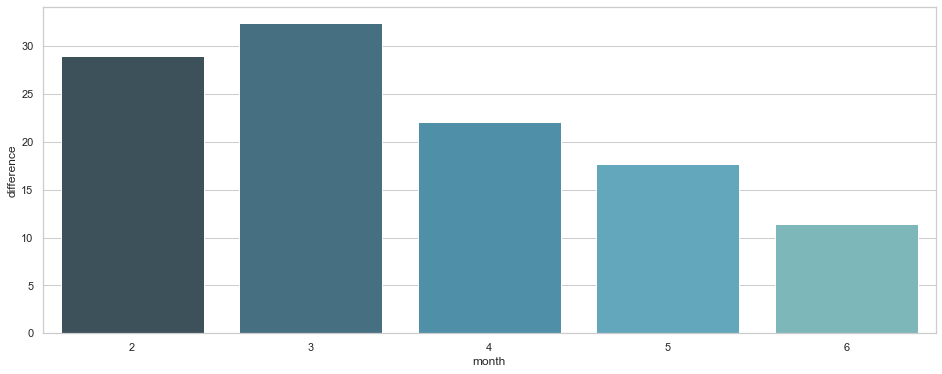

In [30]:
plt.figure(figsize=(16, 6))
sns.barplot(x="month", y="difference",data=HB, ci=None)
plt.show()

In [63]:
D["hour_end" ] = D["datetime_end"].dt.hour
D.head()

,day,time,b_number,city,trip_duration,orig_lat,orig_lng,dest_lat,dest_lng,datetime_start,...,weekday,month,hour,distance,rounded_time_hourly,temp,wind,rain,difference,hour_end
0,2019-02-06,15:35:00,538,duesseldorf,0 days 00:17:00,51.218927,6.765862,51.240644,6.781982,2019-02-06 15:35:00,...,2,2,15,2.662958,2019-02-06 16:00:00,9.5,5.0,0.0,312.083333,15
1,2019-02-19,15:57:00,538,duesseldorf,0 days 00:23:00,51.213766,6.751624,51.223056,6.779230,2019-02-19 15:57:00,...,1,2,15,2.182598,2019-02-19 16:00:00,10.3,5.6,0.0,741.000000,16
2,2019-03-22,13:20:00,538,duesseldorf,0 days 01:20:00,51.229671,6.797855,51.218527,6.794867,2019-03-22 13:20:00,...,4,3,13,1.256486,2019-03-22 13:00:00,19.0,3.5,0.0,111.900000,14
3,2019-03-27,06:34:00,538,duesseldorf,0 days 00:22:00,51.218527,6.794867,51.252515,6.782041,2019-03-27 06:34:00,...,2,3,6,3.883302,2019-03-27 07:00:00,4.8,0.5,0.0,31.966667,6
4,2019-03-28,14:54:00,538,duesseldorf,0 days 00:12:00,51.252515,6.782041,51.242592,6.782100,2019-03-28 14:54:00,...,3,3,14,1.103349,2019-03-28 15:00:00,12.5,1.7,0.0,24.416667,15


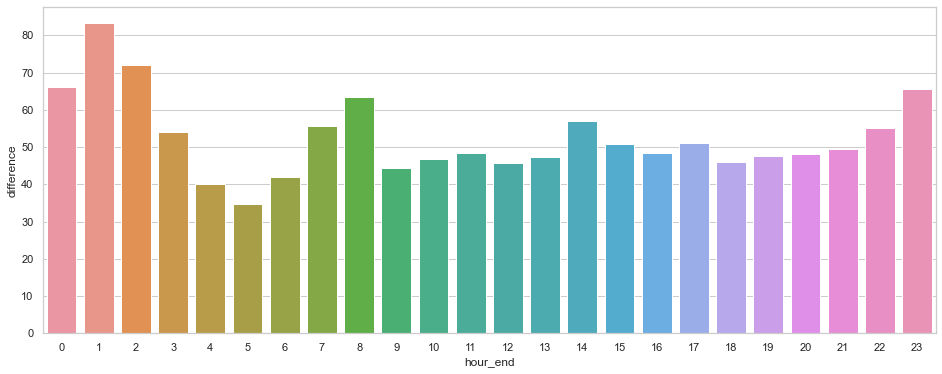

In [64]:
plt.figure(figsize=(16, 6))
sns.barplot(x="hour_end", y="difference",data=D, ci=None)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

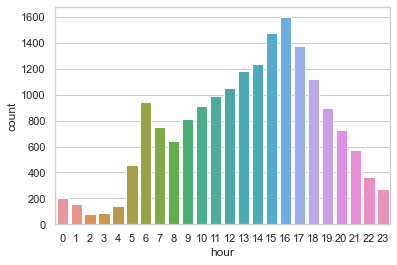

In [276]:
sns.countplot(x="hour", data=iris)
plt.show

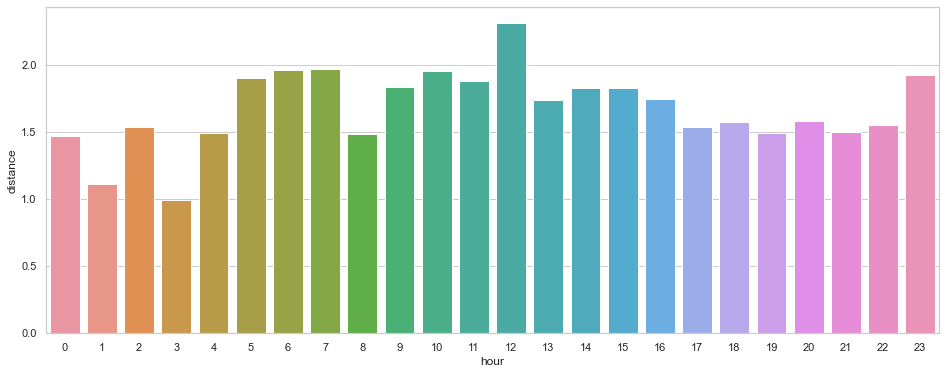

In [32]:
plt.figure(figsize=(16, 6))
sns.barplot(x="hour", y="distance",data=D, ci=None)
plt.show()

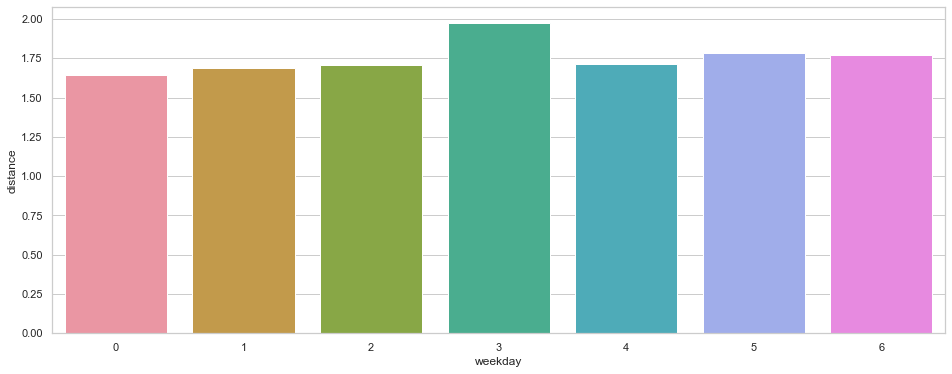

In [33]:
plt.figure(figsize=(16, 6))
sns.barplot(x="weekday", y="distance",data=D, ci=None)
plt.show()

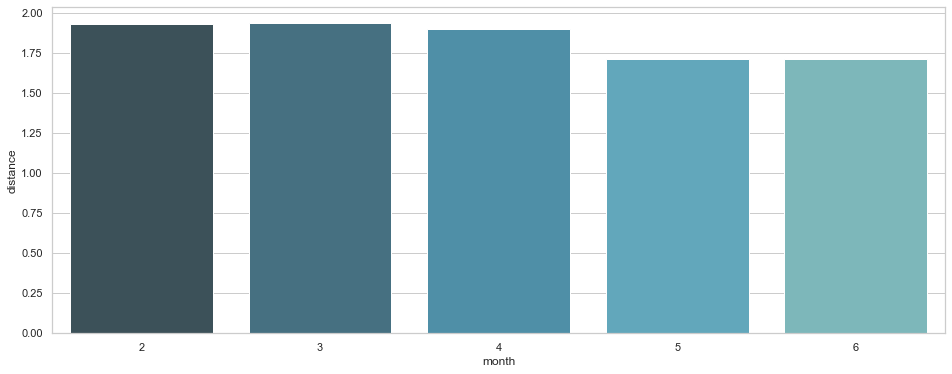

In [34]:
plt.figure(figsize=(16, 6))
sns.barplot(x="month", y="distance",data=D, ci=None)
plt.show()

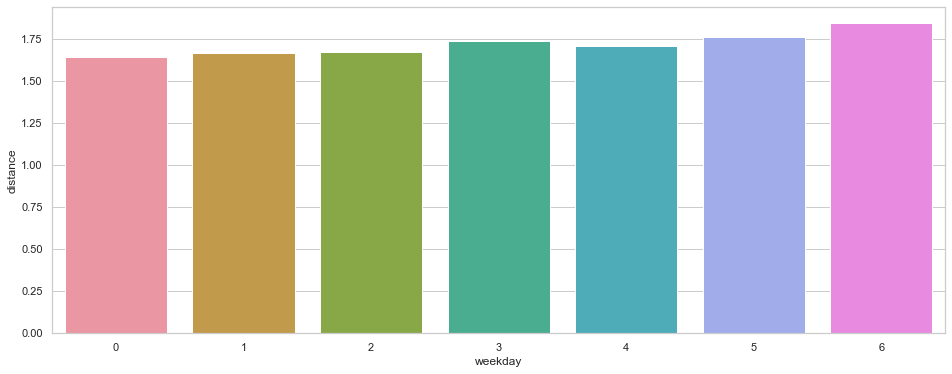

In [38]:
plt.figure(figsize=(16, 6))
sns.barplot(x="weekday", y="distance",data=HB, ci=None)
plt.show()